# Stocks analysis project (python)
For this project, first it'll be used this document to set general guidelines, functions and more that yfinance library has. 

In this project let's assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. Your job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges

### I. Extracting stock data 

In [54]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [55]:
import yfinance as yf
import pandas as pd

create object to access functions:

In [30]:
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

### Stock info

In [31]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

### Extracting share price

In [32]:
#historical data:
apple_historical=apple.history(start='2022-01-14',end='2022-02-14',interval='2m',actions=True)
apple_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-01-14 09:30:00-05:00,171.339996,172.309998,171.279999,172.130005,3165127,0.0,0
2022-01-14 09:32:00-05:00,172.149994,172.279404,171.610001,171.779999,772296,0.0,0
2022-01-14 09:34:00-05:00,171.375000,172.259995,171.360001,172.190002,858147,0.0,0
2022-01-14 09:36:00-05:00,172.125000,172.190002,171.929993,172.100006,792832,0.0,0
2022-01-14 09:38:00-05:00,172.360001,172.500000,172.300003,172.470001,668498,0.0,0
...,...,...,...,...,...,...,...
2022-02-11 15:50:00-05:00,169.100006,169.250000,168.699997,169.050003,753098,0.0,0
2022-02-11 15:52:00-05:00,169.039993,169.139999,168.710007,169.009995,781652,0.0,0
2022-02-11 15:54:00-05:00,169.000000,169.699997,168.830002,169.600006,1058853,0.0,0


In [40]:
#the options for period can be 1d,5d, 1mo (1 month), 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, and max
apple_share_price_data=apple.history(period="max")
apple_share_price_data_first=apple_share_price_data.head()
apple_share_price_data_first

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

<AxesSubplot:xlabel='Date'>

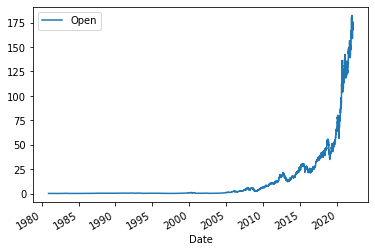

In [34]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends
Dividends are the benefits a company has and are distributed to a company's shareholders, depending on the number of shares an investor has.

In [35]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

<AxesSubplot:xlabel='Date'>

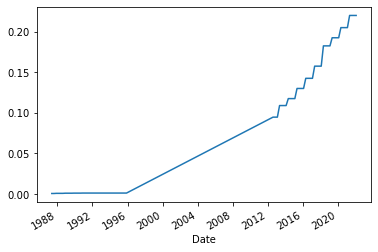

In [36]:
apple.dividends.plot()

In [37]:
apple_info['sector']

'Technology'

To find the volume traded on the 1st day:

In [50]:
apple_share_price_data_first['Volume'].iloc[0]

469033600

Practice with another ticker:

In [61]:
amd=yf.Ticker("AMD")
amd


yfinance.Ticker object <AMD>

In [64]:
amd.info['sector']

'Technology'

In [68]:
amd_history=apple.history(period="max")
amd_history_f=amd_history.head()
amd_history['Volume'].iloc[-1]

82614200

In [66]:
amd_history_f

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


# Extracting Stock Data Using a Web Scraping

In [69]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4

'mamba' is not recognized as an internal or external command,
operable program or batch file.
'mamba' is not recognized as an internal or external command,
operable program or batch file.


  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3


In [70]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

in this example I'm extracting netflix stock data:

In [71]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

Next we must parse the text into html using `beautiful_soup`


In [72]:
soup = BeautifulSoup(data, 'html5lib')

turn the html table into a pandas dataframe:

In [73]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    